# 機械学習　第５章　実習問題（分類：決定木）

### ※ 準備作業
### ⓵ドライブのマウント
### ⓶ディレクトリの作成
### ⓷作成したディレクトリへの移動
### ⓸csvファイル wine.csvのアップロード

### ※ 使用するデータ（wine.csv）

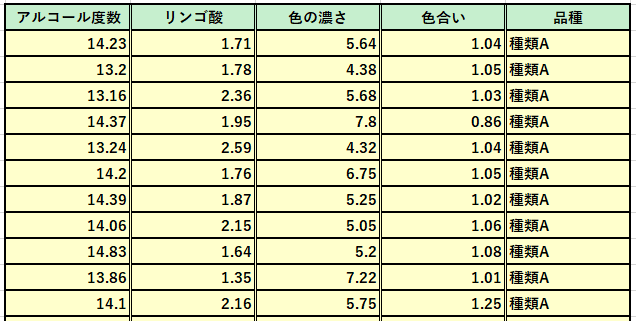

## ※ 実施内容
### 決定木モデルを使用し、アルコール度数、リンゴ酸、色の濃さ、色合いを特徴量として品種を分類する


## 問題１
### scikit-learnからtreeモジュールをインポートしてください。
### また、pandasをインポートして別名をpdにしてください。

In [1]:
# treeモジュールをインポート
# 実装
from sklearn import tree
# pandasをインポートして別名をpdとする
# 実装
import pandas as pd

## 問題２
### アップロードした wine.csv を読み込んでデータフレームを生成して先頭の５行を表示してください。

In [3]:
# wine.csv を読み込みデータフレームを生成（ただし、漢字コードをshift_jisとする
# 実装
df = pd.read_csv('wine.csv',encoding='shift_jis')
# 表示
# 実装
df.head(4)

,アルコール度数,リンゴ酸,色の濃さ,色合い,品種
0,14.23,1.71,5.64,1.04,種類A
1,13.20,1.78,4.38,1.05,種類A
2,13.16,2.36,5.68,1.03,種類A
3,14.37,1.95,7.80,0.86,種類A


### ▶実行結果

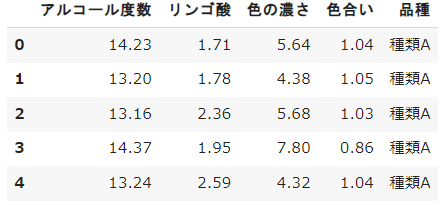

## 問題３
### 問題２で生成したデータフレームの末尾５行を表示して下さい。

In [4]:
# データフレームの末尾５行を表示
# 実装
df.tail(5)

,アルコール度数,リンゴ酸,色の濃さ,色合い,品種
176,13.40,3.91,7.3,0.70,種類C
177,13.27,4.28,10.2,0.59,種類C
178,NaN,5.23,10.4,0.60,種類C
179,13.17,2.59,9.3,0.60,種類C
180,14.13,4.10,9.2,0.61,種類C


### ▶実行結果

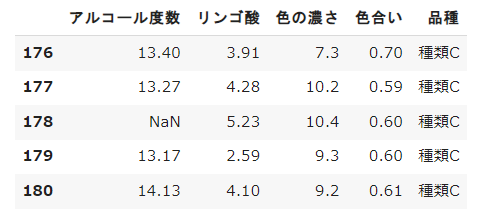

## 問題４
### 正解データ（品種列）の値を確認して表示してください。

In [9]:
# 品種列の値の種類を表示
# 実装
s = df['品種'].unique()
print('品種列の値の種類は')
print(s[0])
print(s[1])
print(s[2])
print('です。')

品種列の値の種類は
種類A
種類B
種類C
です。


### ▶実行結果

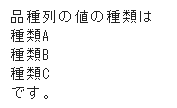

## 問題５
### 正解データ（品種列）のデータの出現回数を表示してください。

In [10]:
# 品種列のデータの出現回数を表示
# 実装
df['品種'].value_counts()

種類B    72
種類A    60
種類C    49
Name: 品種, dtype: int64

### ▶実行結果

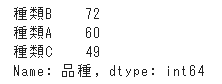

## 問題６
### ワインデータの各マスが欠損値がどうかを調べて表示してください。

In [11]:
# ワインデータの各マスが欠損値かどうかを表示
# 実装
df.isnull()

,アルコール度数,リンゴ酸,色の濃さ,色合い,品種
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
176,False,False,False,False,False
177,False,False,False,False,False
178,True,False,False,False,False
179,False,False,False,False,False


### ▶実行結果

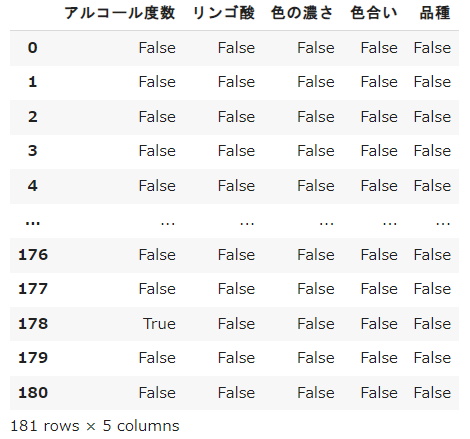

## 問題７
### ワインデータの列単位での欠損データを調べて表示してください。

In [12]:
# ワインデータの列単位で欠損値が存在するかどうかを表示
# 実装
df.isnull().any(axis=0)

アルコール度数     True
リンゴ酸       False
色の濃さ        True
色合い         True
品種         False
dtype: bool

### ▶実行結果

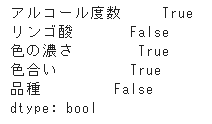

## 問題８
### ワインデータの各列の欠損値の数を表示してください。

In [16]:
# 各列の欠損値の数を表示
# 実装
df.isnull().sum()

アルコール度数    1
リンゴ酸       0
色の濃さ       1
色合い        1
品種         0
dtype: int64

## 問題９
### 欠損値がある行を削除した場合、各列の欠損値の数を表示してください。

In [18]:
# 欠損値が存在する行を削除し、各列の欠損値の数を表示
# 実装
df2 = df.dropna(how = 'any', axis = 0)
df2.isnull().sum()

アルコール度数    0
リンゴ酸       0
色の濃さ       0
色合い        0
品種         0
dtype: int64

### ▶実行結果

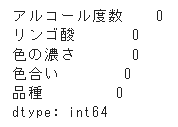

## 問題１０
### ワインデータの各列の欠損値を各列の平均値で埋めて、穴埋めができたことを確認してください。

In [22]:
# 各列の欠損値を各列の平均値で穴埋め
# 実装
df3 = df.fillna(df.mean())
# 欠損値がある否かを確認
# 実装
df3.isnull().sum()

アルコール度数    0
リンゴ酸       0
色の濃さ       0
色合い        0
品種         0
dtype: int64

### ▶実行結果

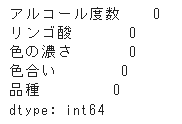

## 問題１１
### 特徴量を変数 x に代入して先頭の５行を表示してください。（ただし、データフレームは問題１０で穴埋めしたデータフレームを使用してください。）

In [26]:
# アルコール度数、リンゴ酸、色の濃さ、色合い列を変数 x に代入
# 実装
x = df3[['アルコール度数','リンゴ酸','色の濃さ','色合い']]
# 特徴量の先頭の５行を表示
# 実装
x.head(5)

,アルコール度数,リンゴ酸,色の濃さ,色合い
0,14.23,1.71,5.64,1.04
1,13.20,1.78,4.38,1.05
2,13.16,2.36,5.68,1.03
3,14.37,1.95,7.80,0.86
4,13.24,2.59,4.32,1.04


### ▶実行結果

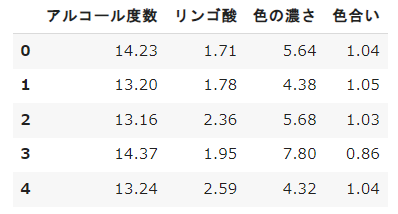

## 問題１２
### 問題１１で作成した特徴量の末尾５行を表示してください。

In [27]:
# 特徴量の末尾５行を表示
# 実装
x.tail(5)

,アルコール度数,リンゴ酸,色の濃さ,色合い
176,13.400000,3.91,7.3,0.70
177,13.270000,4.28,10.2,0.59
178,12.996889,5.23,10.4,0.60
179,13.170000,2.59,9.3,0.60
180,14.130000,4.10,9.2,0.61


### ▶実行結果

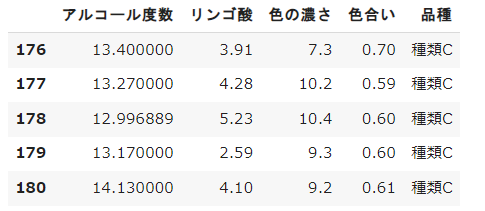

## 問題１３
### 正解データを変数 t に代入して、先頭の５行を表示してください。

In [28]:
# データフレームから品種列を取り出して変数 t に代入
# 実装
t= df3['品種']
# 正解データの先頭の５行を表示
# 実装
t.head(5)

0    種類A
1    種類A
2    種類A
3    種類A
4    種類A
Name: 品種, dtype: object

### ▶実行結果

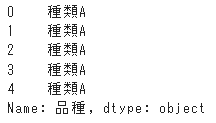

## 問題１４
### 決定木モデルを準備して、学習の実行をさせてください。
### ただし、決定木の深さの最大値を 5 としてくださう。

In [30]:
# モジュールのインポート
# 実装
from sklearn import tree
# 決定木モデルの準備
# 実装
model = tree.DecisionTreeClassifier(max_depth = 5, random_state = 0)

## 問題１５
### 問題１４で作成したモデルを学習し、正解率を表示してください。

In [33]:
# モデルの学習
# 実装
model.fit(x,t)

# 正解率を計算
# 実装
print('ワインの品質予測モデルの正解率 = ', model.score(x,t))

ワインの品質予測モデルの正解率 =  0.9668508287292817


### ▶実行結果

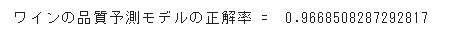

## 問題１６
### 問題１１で作成した特徴量と正解データにおいて
### 訓練データを７割、テストデータを３割にして分割してください。

In [34]:
# 関数のインポート
# 実装
from sklearn.model_selection import train_test_split
# 訓練データとテストデータに分割
# 実装
x_train, x_test, y_train, y_test = train_test_split(x, t,test_size = 0.3, random_state = 0)

## 問題１７
### 問題１６で分割した訓練データとテストデータの行数と列数をそれぞれ表示してください。

In [38]:
# 訓練データの行数と列数を表示
# 実装
lx = x_train.shape
print('x_train:行数 = ',lx[0],'、','列数 = ',lx[1])
# テストデータの行数と列数を表示
# 実装
ly = x_test.shape
print('x_test:行数 = ',ly[0],'、','列数 = ',ly[1])

x_train:行数 =  126 、 列数 =  4
x_test:行数 =  55 、 列数 =  4


### ▶実行結果

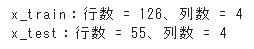

## 問題１８
### 訓練データで学習させて、正解率を計算し表示してください。

In [40]:
# 訓練データで再学習
# 実装
model.fit(x_train,y_train)
# テストデータを使用して成果率を計算し表示
# 実装
print('ワインの品質予測モデルの正解率 = ',model.score(x_test,y_test))

ワインの品質予測モデルの正解率 =  0.8363636363636363


### ▶実行結果

ml_ex_2_run18.PNG

## 問題１９
### 問題１８で作成したモデルを wine_model.pkl という名前で保存してください。

In [41]:
# pickleのインポート
# 実装
import pickle
# モデルを保存
# 実装
with open('wine_model.pkl ','wb') as f:
  pickle.dump(model,f)

### ▶実行結果

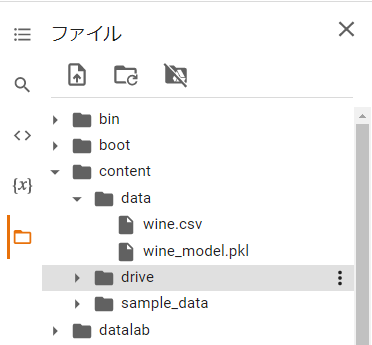

### 問題２０
### 分岐条件の列を決定して表示してください。

In [42]:
# 分岐条件の列を表示
# 実装
model.tree_.feature

array([ 2,  0, -2,  1,  0, -2, -2, -2,  3,  3, -2,  3, -2, -2,  0,  1, -2,
        0, -2, -2, -2], dtype=int64)

### ▶実行結果

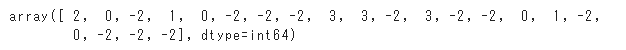

## 問題２１
### 条件分岐のしきい値をもとめて表示してください。

In [43]:
# 条件分岐のしきい値を返す
# 実装
model.tree_.threshold

array([ 3.94500005, 13.05999994, -2.        ,  1.73499995, 13.20499992,
       -2.        , -2.        , -2.        ,  0.85500002,  0.82999998,
       -2.        ,  0.845     , -2.        , -2.        , 13.13499975,
        1.505     , -2.        , 12.24500036, -2.        , -2.        ,
       -2.        ])

### ▶実行結果

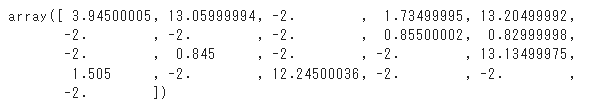

## 問題２２
### 各リーフに到達したデータの数を表示してください。（ただし for 文を使用してください）

In [132]:
# リーフに到達したデータの数を表示
# 実装
#print(len(model.tree_.threshold))
num = 0
array = model.tree_.feature
for i in array :
  if i == -2:
    print('ノード番号', num, 'のデータ数 = ', model.tree_.value[num])
  num += 1
    




ノード番号 2 のデータ数 =  [[ 0. 42.  0.]]
ノード番号 5 のデータ数 =  [[1. 0. 0.]]
ノード番号 6 のデータ数 =  [[0. 3. 0.]]
ノード番号 7 のデータ数 =  [[2. 0. 0.]]
ノード番号 10 のデータ数 =  [[ 0.  0. 30.]]
ノード番号 12 のデータ数 =  [[0. 1. 0.]]
ノード番号 13 のデータ数 =  [[0. 0. 1.]]
ノード番号 16 のデータ数 =  [[0. 6. 0.]]
ノード番号 18 のデータ数 =  [[0. 1. 0.]]
ノード番号 19 のデータ数 =  [[2. 0. 0.]]
ノード番号 20 のデータ数 =  [[37.  0.  0.]]


### ▶実行結果

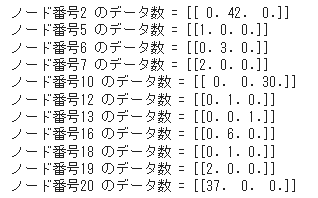

## 問題２２
### アルコール度数 = 11.2、リンゴ酸 = 2.95、色の濃さ = 2.3、色合い = 0.95 のワインの品質を予測させてください。

In [50]:
# アルコール度数 = 11.2、リンゴ酸 = 2.95、色の濃さ = 2.3、色合い = 0.95 のワインの品質を予測
# 実装
model.predict([[11.2,2.95,2.3,0.95]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['種類B'], dtype=object)

### ▶実行結果

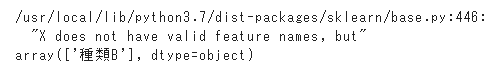

## 問題２３
### アルコール度数 = 14.44、リンゴ酸 = 1.69、色の濃さ = 5.5、色合い = 10.8のワインと
### アルコール度数 = 12.77、リンゴ酸 = 2.95、色の濃さ = 5.2、色合い = 0.78のワインの品質を予測させてください。

In [115]:
# アルコール度数 = 14.44、リンゴ酸 = 1.69、色の濃さ = 5.5、色合い = 10.8のワインのデータ
# 実装
list1 = [14.44,1.69,5.5,10.8]
# アルコール度数 = 12.77、リンゴ酸 = 2.95、色の濃さ = 5.2、色合い = 0.78のワインのデータ
# 実装
list2 = [12.77,2.95,5.2,0.78]
# ２つのワインの品質を一括で予測
# 実装
#↓この書式でもできる！
#model.predict([[14.44,1.69,5.5,10.8],[12.77,2.95,5.2,0.78]])
model.predict([list1,list2])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['種類A', '種類C'], dtype=object)

### ▶実行結果

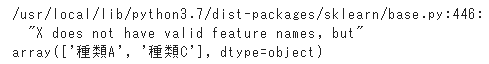

## 問題２４
### 問題１４、１５で作成した決定木モデルの描画をしてください。
### 但し、漢字表示がデフォルトでできないため下記のように列名を英語で記述します。
### アルコール度数 = Alcohol_degree
### リンゴ酸 = Malic_acid
### 色の濃さ = Color_intensity
### 色合い = Tint

[Text(133.92000000000002, 199.32, 'kaben_nagasa <= 3.945\ngini = 0.651\nsamples = 126\nvalue = [42, 53, 31]'),
 Text(44.64, 163.07999999999998, 'gaku_nagasa <= 13.06\ngini = 0.117\nsamples = 48\nvalue = [3, 45, 0]'),
 Text(22.32, 126.83999999999999, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(66.96000000000001, 126.83999999999999, 'gaku_haba <= 1.735\ngini = 0.5\nsamples = 6\nvalue = [3, 3, 0]'),
 Text(44.64, 90.6, 'gaku_nagasa <= 13.205\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(22.32, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(89.28, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(223.2, 163.07999999999998, 'kaben_haba <= 0.855\ngini = 0.582\nsamples = 78\nvalue = [39, 8, 31]'),
 Text(156.24, 126.83999999999999, 'kaben_haba <= 0.83\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(133.92000000000002, 90.6, 'gini = 0.0\nsamp

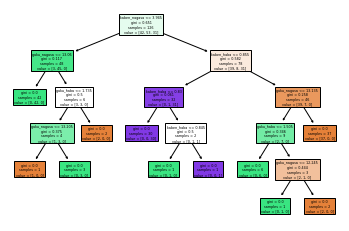

In [57]:
# 描画関数の仕様上、和名の特徴量を英字に直す
# 実装
x_train.columns = ['gaku_nagasa','gaku_haba','kaben_nagasa','kaben_haba']
# 描画関数の利用
# 実装
from sklearn.tree import plot_tree
# plot_tree関数で決定木を描画
# 実装
plot_tree(model, feature_names = x_train.columns, filled = True)

### ▶実行結果
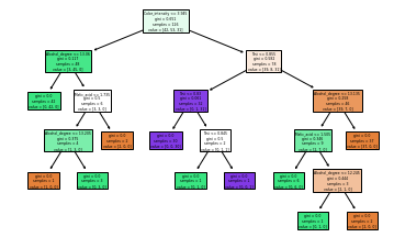